# Data Analysis with IMDB Movie data

## 1. Import libraries và load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt

dataset_path = "/content/IMDB-Movie-Data.csv"

# Read data from .csv file
data = pd.read_csv(dataset_path)

## 2. View the data

In [2]:
# View top 5
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 3. Understand some basic information about the data

In [3]:
# Basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
# More information about the data
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## 4. Data Selection – Indexing and Slicing data

### 4.1 Extract data as Series

In [7]:
# Get genre of films
genre = data["Genre"]
print(type(genre))

<class 'pandas.core.series.Series'>


### 4.2 Extract data as Dataframe

In [8]:
genre_df = data[["Genre"]]
print(type(genre_df))

<class 'pandas.core.frame.DataFrame'>


### 4.3 Slicing

In [11]:
data.loc[10:15, ["Title", "Genre", "Actors", "Director", "Rating"]]

,Title,Genre,Actors,Director,Rating
10,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy","Eddie Redmayne, Katherine Waterston, Alison Su...",David Yates,7.5
11,Hidden Figures,"Biography,Drama,History","Taraji P. Henson, Octavia Spencer, Janelle Mon...",Theodore Melfi,7.8
12,Rogue One,"Action,Adventure,Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,7.9
13,Moana,"Animation,Adventure,Comedy","Auli'i Cravalho, Dwayne Johnson, Rachel House,...",Ron Clements,7.7
14,Colossal,"Action,Comedy,Drama","Anne Hathaway, Jason Sudeikis, Austin Stowell,...",Nacho Vigalondo,6.4
15,The Secret Life of Pets,"Animation,Adventure,Comedy","Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",Chris Renaud,6.6


## 5. Data Selection – Based on Conditional filtering

In [19]:
data_sel = data[((data["Year"]>=2010)&(data["Year"]<=2015)) & (data["Rating"]<6) & (data["Revenue (Millions)"]>=data["Revenue (Millions)"].quantile(0.95))]
data_sel

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


In [105]:
data[data["Year"]>=2010]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.130000,37.0,Bad
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.720000,48.0,Average
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0,Average
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0,Bad


## 6. Groupby Operations

In [21]:
# Mean of rating of directors
data_director = data.groupby(by="Director").mean("Rating")["Rating"]
data_director

,Rating
Director,
Aamir Khan,8.50
Abdellatif Kechiche,7.80
Adam Leon,6.50
Adam McKay,7.00
Adam Shankman,6.30
...,...
Xavier Dolan,7.55
Yimou Zhang,6.10
Yorgos Lanthimos,7.20


## 7. Sorting Operations

In [25]:
# Top 5 directors with the largest mean of rating
data_director_top_5 = data.groupby(by="Director").mean("Rating")["Rating"].sort_values(ascending = False)[:5]
data_director_top_5

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


## 8. View missing values

In [28]:
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


## 9. Deal with missing values - Deleting

In [29]:
# Drop missing columns
data.drop(["Metascore"], axis=1).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


In [30]:
# Drop missing rows
data.dropna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


## 10. Dealing with missing values - Filling

In [32]:
# Fill missing values with mean
data["Revenue (Millions)"].fillna(data["Revenue (Millions)"].mean(), inplace=True)
data["Metascore"].fillna(data["Metascore"].mean(), inplace=True)

In [33]:
# Checking
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


## 11. apply() functions

In [35]:
# Classify movies based on ratings
def rating_based(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 6.0:
        return "Average"
    else:
        return "Bad"

In [36]:
# apply() funtion
data["Rating_Category"] = data["Rating"].apply(rating_based)
data["Rating_Category"]

,Rating_Category
0,Good
1,Average
2,Average
3,Average
4,Average
...,...
995,Average
996,Bad
997,Average
998,Bad


In [37]:
data[["Title", "Director", "Rating", "Rating_Category"]]

,Title,Director,Rating,Rating_Category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Average
...,...,...,...,...
995,Secret in Their Eyes,Billy Ray,6.2,Average
996,Hostel: Part II,Eli Roth,5.5,Bad
997,Step Up 2: The Streets,Jon M. Chu,6.2,Average
998,Search Party,Scot Armstrong,5.6,Bad


# Data Analysis with Time Series data

## 1. Import libraries and read dataset

In [45]:
import pandas as pd

dataset_path = "/content/opsd_germany_daily.csv"

# Read data from csv file and set Date column as a index
opsd_daily = pd.read_csv(dataset_path, index_col = 0, parse_dates = True)

In [46]:
print(opsd_daily.shape)
print(opsd_daily.dtypes)

(4383, 4)
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [47]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [48]:
# Add some columns
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## 2. Time-based indexing

In [49]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [50]:
opsd_daily.loc["2012-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


## 3. Visualizing time series data

In [53]:
import matplotlib . pyplot as plt
import seaborn as sns

<Axes: xlabel='Date'>

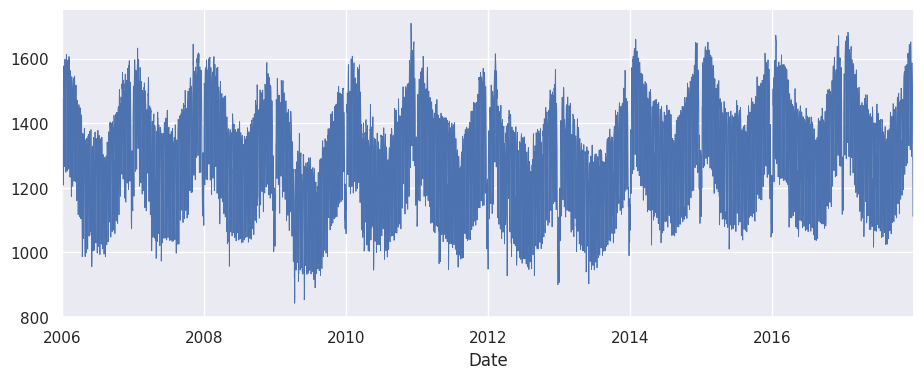

In [54]:
# Use seaborn style defaults and set the default figure size
sns.set(rc = {"figure.figsize": (11, 4)})
opsd_daily["Consumption"].plot(linewidth = 0.6)

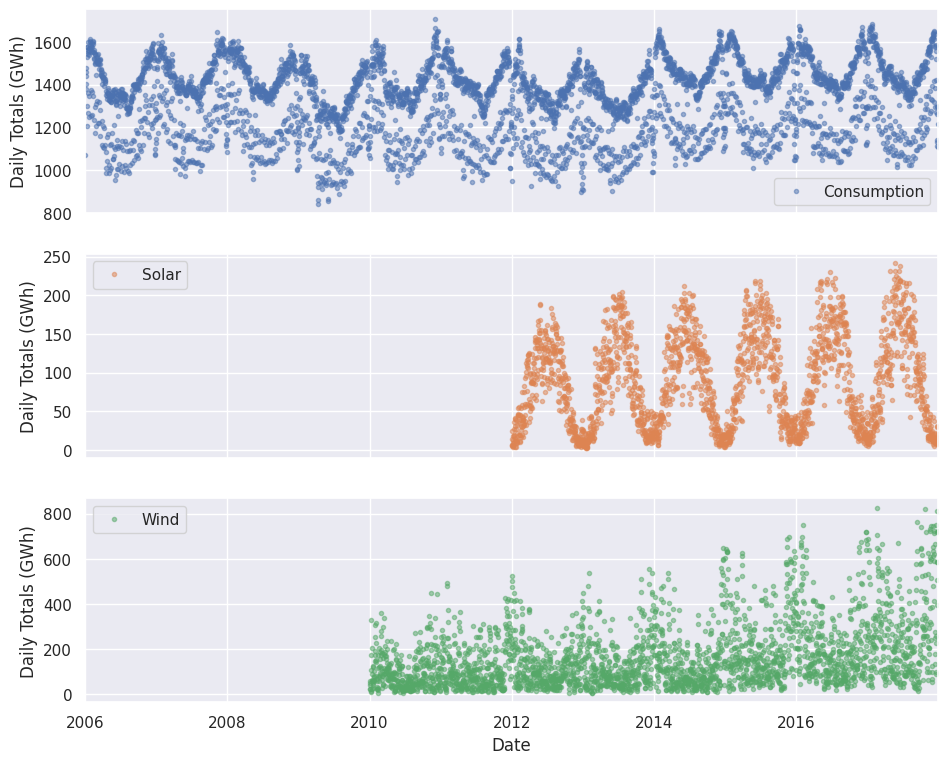

In [59]:
cols_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_plot].plot(marker = ".", alpha = 0.5 , linestyle = "None", figsize =(11 , 9) , subplots = True)

for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

## 4. Seasonality

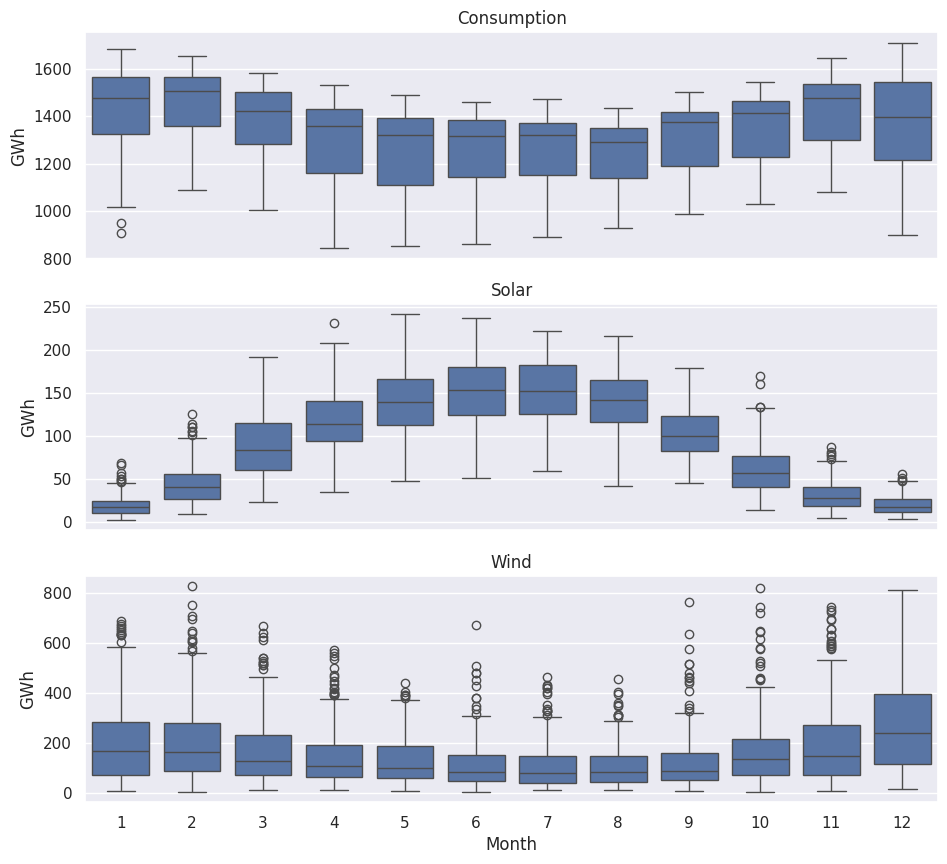

In [62]:
cols_plot = ["Consumption", "Solar", "Wind"]
fig, axes = plt.subplots(3, 1, figsize = (11, 10), sharex = True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data = opsd_daily , x = "Month", y = name , ax = ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)

## 5. Frequencies

In [64]:
# Create time range
times_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])
times_sample

DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)

In [65]:
# Select the specified dates
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [66]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq("D")
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [67]:
# Create a column with forward filled values
consum_freq["Consumption Forward Fill"] = consum_sample.asfreq("D", method = "ffill")
consum_freq

,Consumption,Consumption Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [68]:
# Create a column with back filled values
consum_freq["Consumption Back Fill"] = consum_sample.asfreq("D", method = "bfill")
consum_freq

,Consumption,Consumption Forward Fill,Consumption Back Fill
2013-02-03,1109.639,1109.639,1109.639
2013-02-04,NaN,1109.639,1451.449
2013-02-05,NaN,1109.639,1451.449
2013-02-06,1451.449,1451.449,1451.449
2013-02-07,NaN,1451.449,1433.098
2013-02-08,1433.098,1433.098,1433.098


## 6. Resampling

In [69]:
# Resampling - Downsampling data
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]

# Resample to weekly frequency with mean
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


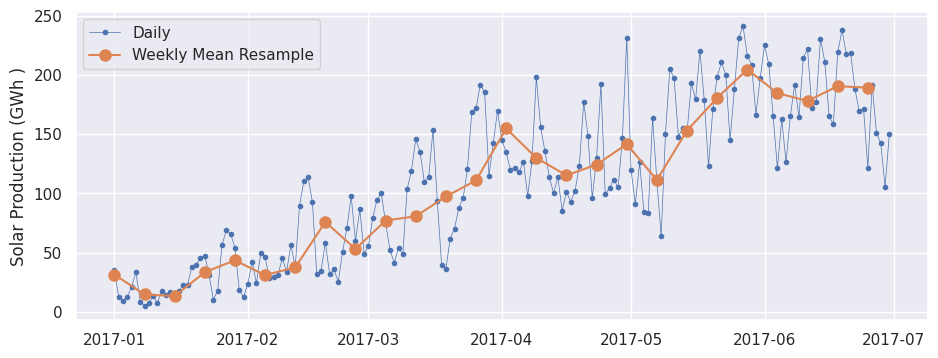

In [70]:
# Visualize daily và weekly time series
start, end = "2017-01", "2017-06"

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"], marker = ".", linestyle = "-", linewidth = 0.5 , label = "Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker ="o", markersize = 8, linestyle = "-", label ="Weekly Mean Resample")
ax.set_ylabel("Solar Production (GWh )")
ax.legend()
plt.show()

In [75]:
# Create year index with mean values
opsd_annual = opsd_daily[data_columns].resample("Y").sum(min_count = 360)
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [76]:
# Compute the ratio of Wind + Solar to Consumption
opsd_annual["Wind+Solar/Consumption"] = opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
opsd_annual.tail()

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


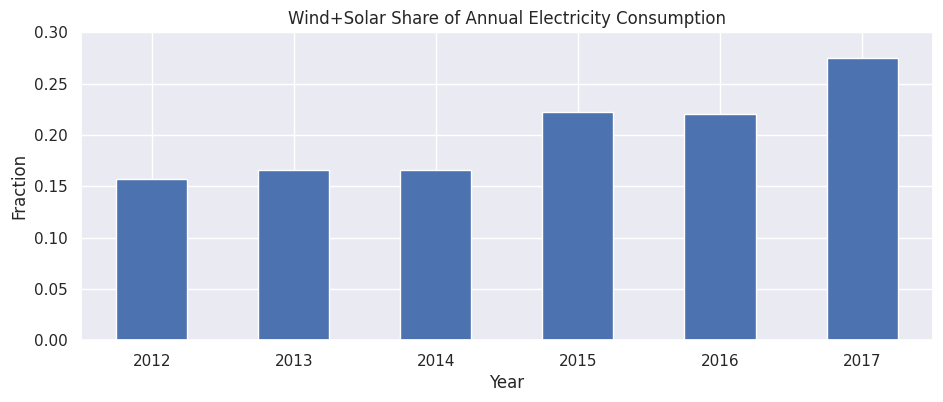

In [79]:
# Visualize
ax = opsd_annual.loc[2012:, "Wind+Solar/Consumption"].plot.bar(color = "C0")
ax.set_ylabel("Fraction")
ax.set_ylim (0, 0.3)
ax.set_title("Wind+Solar Share of Annual Electricity Consumption")
plt.xticks(rotation = 0)
plt.show()

## 7. Rolling windows

In [80]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


## 8. Trends

In [87]:
# The min_periods = 360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window = 365, center = True, min_periods = 360).mean()
opsd_365d[3000:3005]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-03-20,1356.418321,143.358629,89.870736,233.619174
2014-03-21,1356.540956,143.121953,89.928000,233.438613
2014-03-22,1356.096016,142.926780,90.037559,233.352224
2014-03-23,1356.093000,143.244599,89.963350,233.597384
2014-03-24,1357.177392,143.613212,89.928829,233.933417


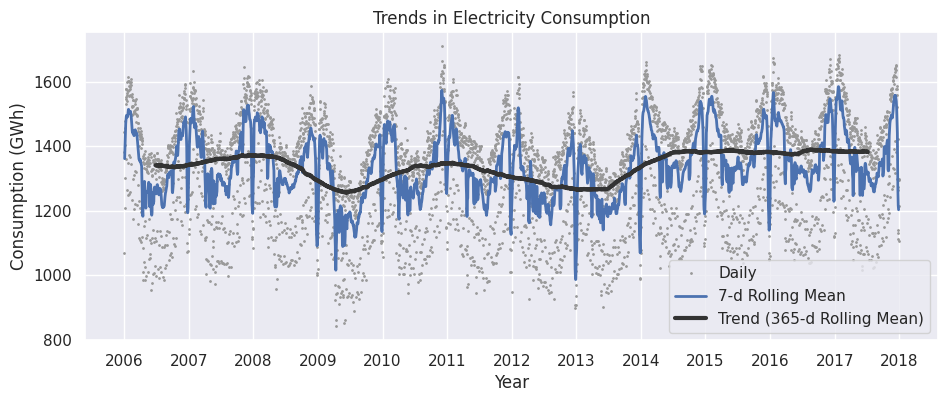

In [98]:
import matplotlib.dates as mdates

# Plot daily, 7-day rolling mean , and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily["Consumption"], marker = ".", markersize =2, color ="0.6", linestyle = "None", label = "Daily")
ax.plot(opsd_7d["Consumption"], linewidth = 2, label = "7-d Rolling Mean")
ax.plot(opsd_365d["Consumption"], color = "0.2", linewidth = 3, label = "Trend (365-d Rolling Mean)")

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trends in Electricity Consumption")
plt.show()

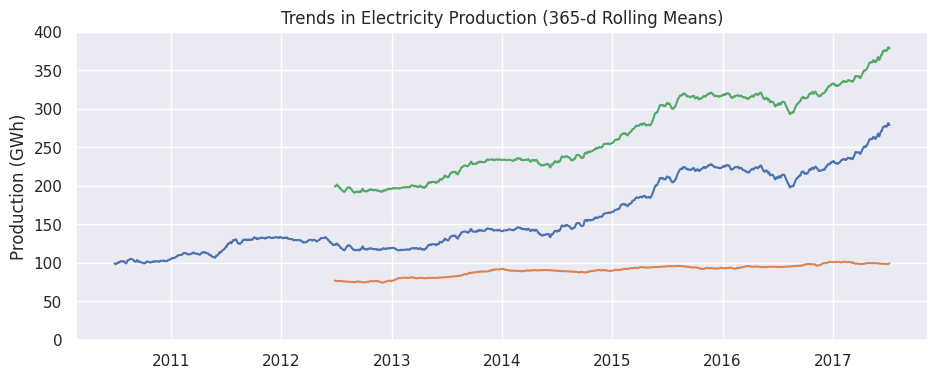

In [100]:
# Plot 365-day rolling mean time series of wind and solar power
e_columns = ["Wind", "Solar", "Wind+Solar"]
fig, ax = plt.subplots()
for e in e_columns:
    ax.plot(opsd_365d[e], label = e)

    # Set x-ticks to yearly interval , adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel("Production (GWh)")
    ax.set_title("Trends in Electricity Production (365-d Rolling Means)")
plt.show()